In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os

In [ ]:
spotipy.readthedocs.io/en/2.9.0/

In [2]:
import sys
sys.path.append("C:/git/mouse-control/")

from mousecontrol.listener import MouseMoveListener

In [10]:
listener = MouseMoveListener()

In [13]:
c = listener.listen(20,max_stop = 0.5)

Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording


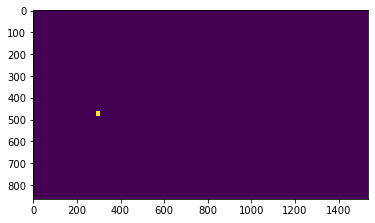

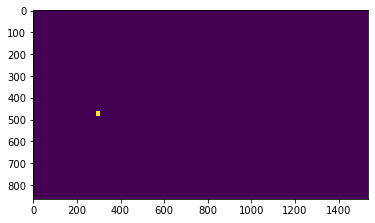

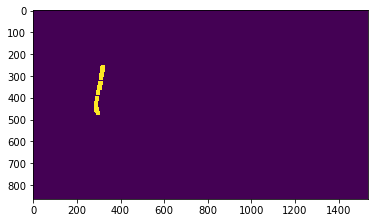

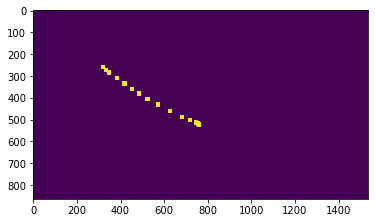

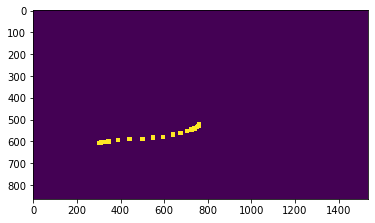

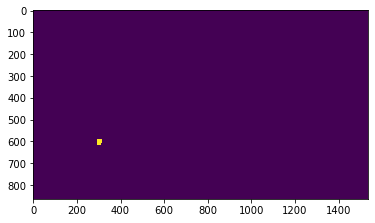

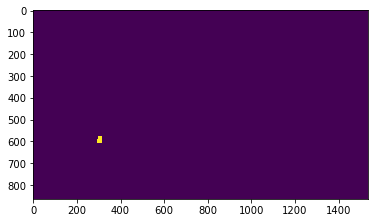

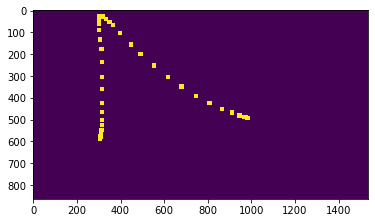

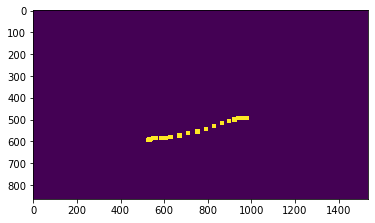

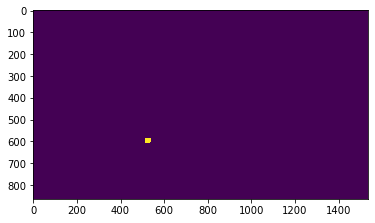

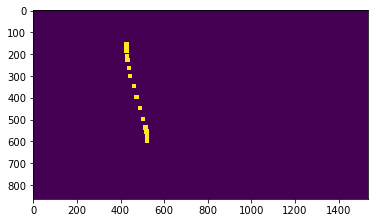

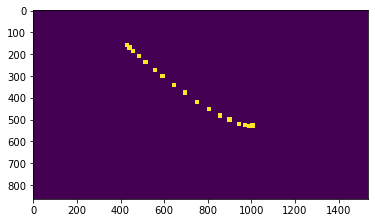

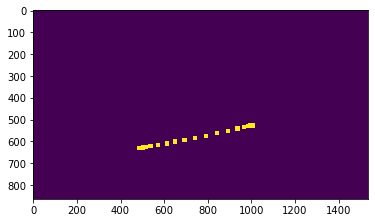

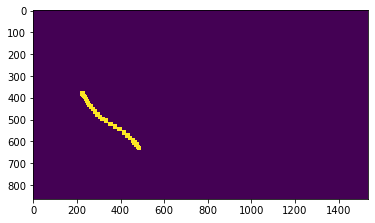

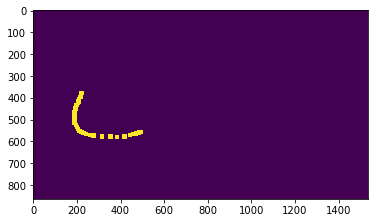

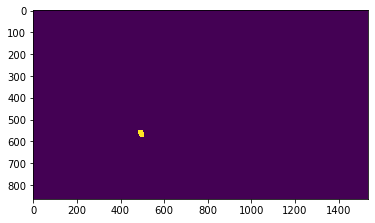

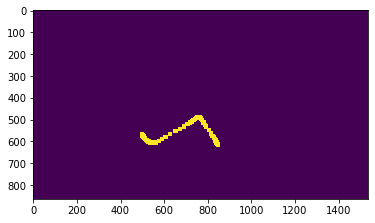

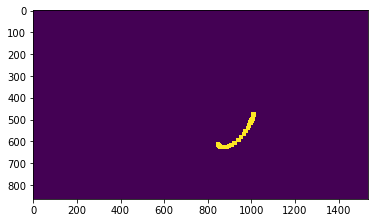

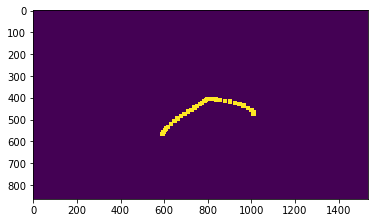

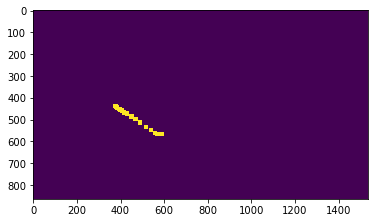

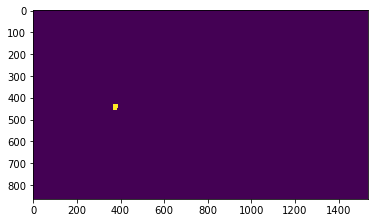

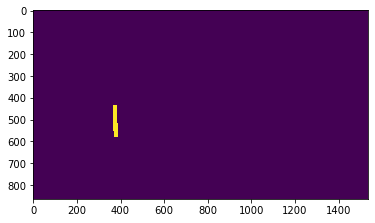

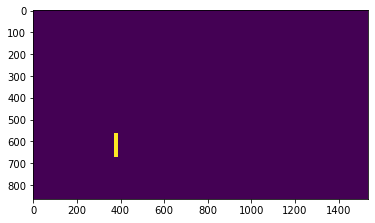

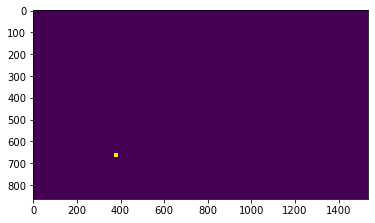

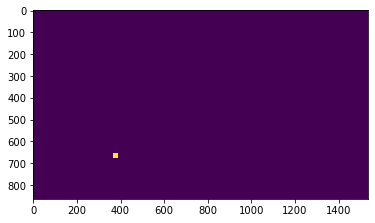

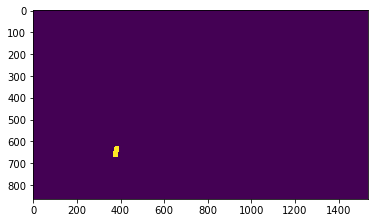

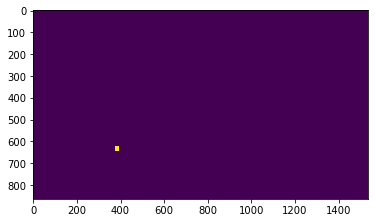

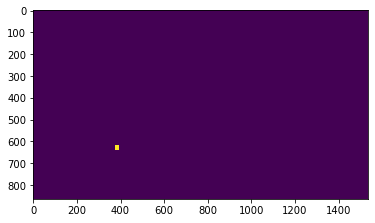

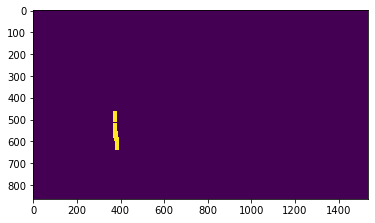

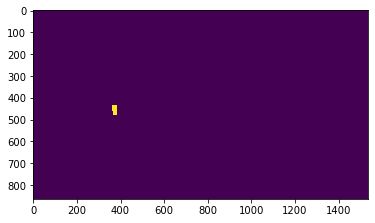

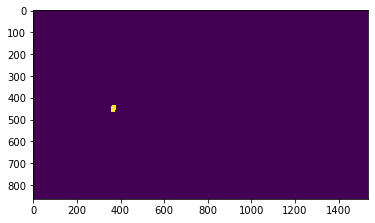

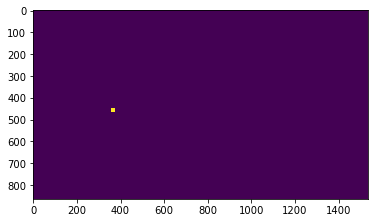

In [14]:
for i in c:
    plt.imshow(i.T)
    plt.show()

In [57]:
c,i,q = store_mouse_movement(duration = 20,pad = 10,max_stop = 1)

Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording
Start recording
Stop recording


In [60]:
from PIL import Image

In [61]:
im = Image.fromarray(np.uint8(c.T*255))

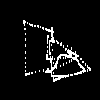

In [62]:
im.resize((100,100))